# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [12]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io as io

# Obtencion de la pagina web
headers ={
    'User-Agent':'Lg Chrome'}

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url, headers= headers)


# Verficacion de respuesta.

print("Estado:", response.status_code)

# Extraccion de tablas.

html = io.StringIO( response.text)
tables = pd.read_html(html)

print(f"Se encontraron {len(tables)} tablas.")


Estado: 200
Se encontraron 26 tablas.


In [ ]:
# extrae la primera tabla de las 27 encontradas
df = tables[0]
df.head()

# Limpieza de datos

# Renombramos columnas 
df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]

# Eliminamos notas entre corchetes
df["Song"] = df["Song"].str.replace(r"\[.*?\]", "", regex=True)
df["Artist"] = df["Artist"].str.replace(r"\[.*?\]", "", regex=True)

df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()

# Convertimos Streams a números flotantes
df["Streams (billions)"] = df["Streams (billions)"].astype(float)

# Convertimos fechas a datetime
df["Date released"] = pd.to_datetime(df["Date released"], errors="coerce")

df


,Rank,Song,Artist,Streams (billions),Date released,Reference
0,1,"""Blinding Lights""",The Weeknd,5.236,2019-11-29,[1]
1,2,"""Shape of You""",Ed Sheeran,4.729,2017-01-06,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.316,2012-12-03,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.313,2016-09-21,[4]
4,5,"""As It Was""",Harry Styles,4.199,2022-04-01,[5]
...,...,...,...,...,...,...
95,96,"""Sicko Mode""",Travis Scott and Drake,2.518,2018-08-21,[96]
96,97,"""Payphone""",Maroon 5 and Wiz Khalifa,2.516,2012-04-16,[97]
97,98,"""All I Want for Christmas is You""",Mariah Carey,2.504,1994-11-01,[98]
98,99,"""Someone Like You""",Adele,2.501,2011-01-24,[99]


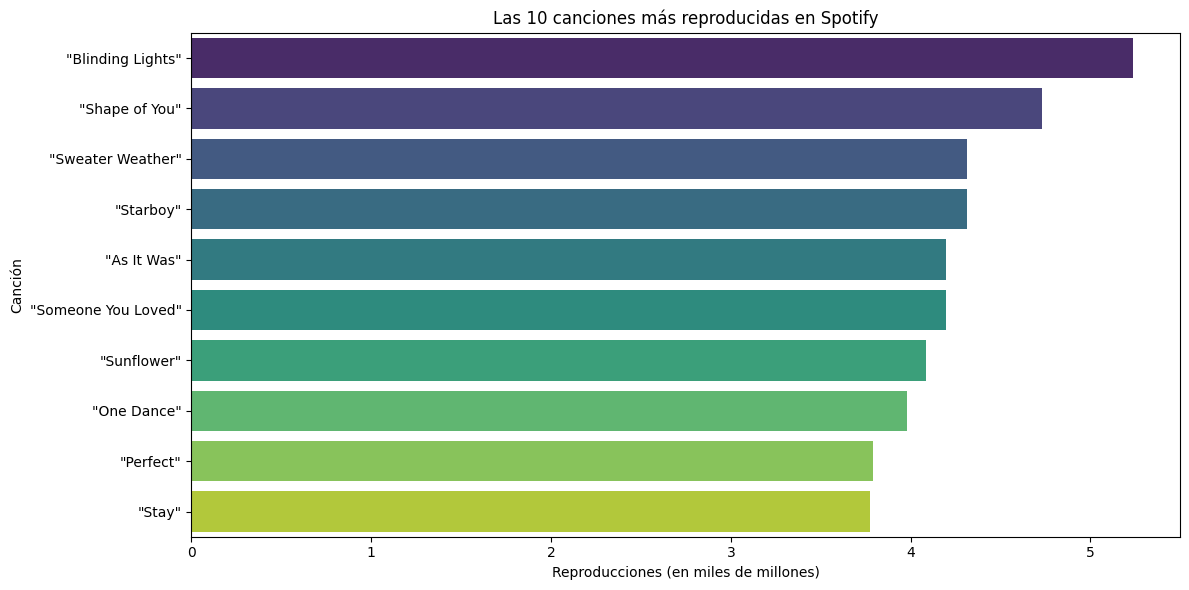

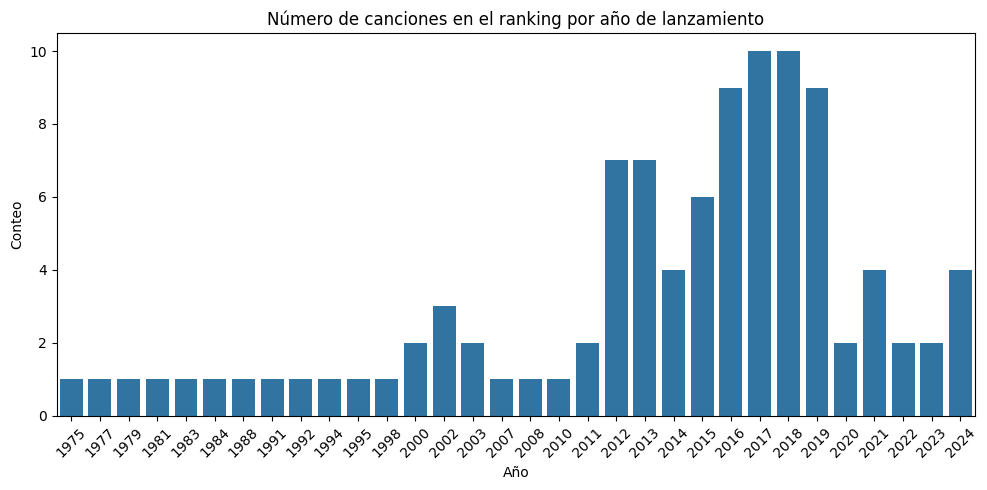

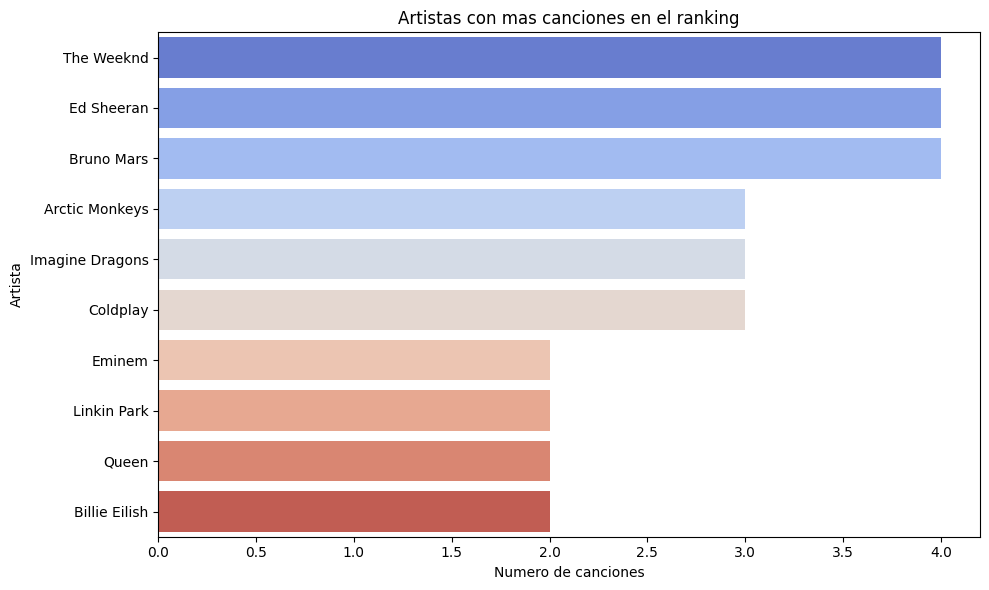

In [17]:
# Graficar los datos

#Las 10 canciones más reproducidas
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="viridis", legend=False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (en miles de millones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()

# Numero de canciones por año

df["Year"] = df["Date released"].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Year", order=sorted(df["Year"].dropna().unique()))
plt.title("Número de canciones en el ranking por año de lanzamiento")
plt.xlabel("Año")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Artistas con la mayor cantidad de canciones en el ranking

artists = df["Artist"].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artists.values, y=artists.index, hue=artists.index, palette="coolwarm", legend=False)
plt.title("Artistas con mas canciones en el ranking")
plt.xlabel("Numero de canciones")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()